In [1]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [2]:
import pandas as pd
data = pd.read_csv("F:/UOP\project\dataset\cluster\data_fill_missing_data_clustered.csv")
print(data.head())

   Unnamed: 0 Patient_ID     HR  O2Sat   Temp    SBP     MAP      DBP  Resp  \
0           0    p000001   97.0   95.0  36.11   98.0  75.330  63.9950  19.0   
1           1    p000001   97.0   95.0  36.11   98.0  75.330  63.9950  19.0   
2           2    p000001   89.0   99.0  36.11  122.0  86.000  68.0000  22.0   
3           3    p000001   90.0   95.0  36.11  122.0  88.665  71.9975  30.0   
4           4    p000001  103.0   88.5  36.11  122.0  91.330  75.9950  24.5   

   EtCO2  ...  HospAdmTime  ICULOS  SepsisLabel  Age_category  Error_BP  \
0   32.0  ...        -0.03     1.0          0.0           3.0       0.0   
1   32.0  ...        -0.03     2.0          0.0           3.0       0.0   
2   32.0  ...        -0.03     3.0          0.0           3.0       0.0   
3   32.0  ...        -0.03     4.0          0.0           3.0       0.0   
4   32.0  ...        -0.03     5.0          0.0           3.0       0.0   

   Label_Index  Sepsis_Time  Unit3  Kmeans_cluster  GMM_cluster  
0       

# Exploratory Data Analysis

In [3]:
display(data)

,Unnamed: 0,Patient_ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,HospAdmTime,ICULOS,SepsisLabel,Age_category,Error_BP,Label_Index,Sepsis_Time,Unit3,Kmeans_cluster,GMM_cluster
0,0,p000001,97.0,95.0,36.11,98.0,75.330,63.9950,19.0,32.0,...,-0.03,1.0,0.0,3.0,0.0,0.0,-999.0,0,1,2
1,1,p000001,97.0,95.0,36.11,98.0,75.330,63.9950,19.0,32.0,...,-0.03,2.0,0.0,3.0,0.0,0.0,-999.0,0,1,2
2,2,p000001,89.0,99.0,36.11,122.0,86.000,68.0000,22.0,32.0,...,-0.03,3.0,0.0,3.0,0.0,0.0,-999.0,0,1,2
3,3,p000001,90.0,95.0,36.11,122.0,88.665,71.9975,30.0,32.0,...,-0.03,4.0,0.0,3.0,0.0,0.0,-999.0,0,1,2
4,4,p000001,103.0,88.5,36.11,122.0,91.330,75.9950,24.5,32.0,...,-0.03,5.0,0.0,3.0,0.0,0.0,-999.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,1552205,p120000,80.0,96.0,36.45,115.0,87.000,65.0000,15.0,34.0,...,0.00,31.0,0.0,2.0,0.0,0.0,-999.0,0,1,3
1552206,1552206,p120000,74.0,97.0,36.50,114.0,83.000,67.0000,15.0,34.0,...,0.00,32.0,0.0,2.0,0.0,0.0,-999.0,0,1,3
1552207,1552207,p120000,78.0,98.0,36.55,110.0,83.000,69.0000,15.0,34.0,...,0.00,33.0,0.0,2.0,0.0,0.0,-999.0,0,1,3
1552208,1552208,p120000,82.0,99.0,36.60,124.0,91.000,71.0000,16.0,34.0,...,0.00,34.0,0.0,2.0,0.0,0.0,-999.0,0,1,3


In [4]:
print(data.columns)

Index(['Unnamed: 0', 'Patient_ID', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Age_category', 'Error_BP',
       'Label_Index', 'Sepsis_Time', 'Unit3', 'Kmeans_cluster', 'GMM_cluster'],
      dtype='object')


In [5]:
data.describe()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,HospAdmTime,ICULOS,SepsisLabel,Age_category,Error_BP,Label_Index,Sepsis_Time,Unit3,Kmeans_cluster,GMM_cluster
count,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,...,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06,1552210.0,1.552210e+06,1.552210e+06
mean,7.761045e+05,8.439719e+01,9.715727e+01,3.686009e+01,1.237357e+02,8.270438e+01,6.270346e+01,1.865481e+01,3.335742e+01,-1.586496e-02,...,-5.612487e+01,2.699499e+01,1.798468e-02,2.314082e+00,5.181644e-03,9.522165e-02,-8.941343e+02,0.0,9.965076e-01,1.759909e+00
std,4.480846e+05,1.734657e+01,3.079372e+00,6.956160e-01,2.309072e+01,1.598400e+01,1.420791e+01,5.101158e+00,4.111809e+00,2.534336e+00,...,1.622565e+02,2.900542e+01,1.328956e-01,7.243669e-01,7.179692e-02,7.962563e-01,2.972421e+02,0.0,5.899360e-02,1.150277e+00
min,0.000000e+00,2.000000e+01,2.000000e+01,2.090000e+01,2.000000e+01,2.000000e+01,0.000000e+00,1.000000e+00,1.000000e+01,-3.200000e+01,...,-5.366860e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,0.0,0.000000e+00,0.000000e+00
25%,3.880522e+05,7.200000e+01,9.600000e+01,3.642500e+01,1.070000e+02,7.125000e+01,5.300000e+01,1.550000e+01,3.250000e+01,0.000000e+00,...,-4.705000e+01,1.100000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,0.0,1.000000e+00,1.000000e+00
50%,7.761045e+05,8.300000e+01,9.800000e+01,3.682000e+01,1.210000e+02,8.100000e+01,6.100000e+01,1.800000e+01,3.300000e+01,0.000000e+00,...,-6.030000e+00,2.100000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,0.0,1.000000e+00,2.000000e+00
75%,1.164157e+06,9.500000e+01,9.900000e+01,3.729250e+01,1.380000e+02,9.200000e+01,7.100000e+01,2.100000e+01,3.450000e+01,0.000000e+00,...,-4.000000e-02,3.400000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,0.0,1.000000e+00,3.000000e+00
max,1.552209e+06,2.800000e+02,1.000000e+02,5.000000e+01,3.180000e+02,3.000000e+02,3.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,2.399000e+01,3.360000e+02,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+01,3.000000e+00,0.0,1.000000e+00,3.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 50 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Patient_ID        1552210 non-null  object 
 2   HR                1552210 non-null  float64
 3   O2Sat             1552210 non-null  float64
 4   Temp              1552210 non-null  float64
 5   SBP               1552210 non-null  float64
 6   MAP               1552210 non-null  float64
 7   DBP               1552210 non-null  float64
 8   Resp              1552210 non-null  float64
 9   EtCO2             1552210 non-null  float64
 10  BaseExcess        1552210 non-null  float64
 11  HCO3              1552210 non-null  float64
 12  FiO2              1552210 non-null  float64
 13  pH                1552210 non-null  float64
 14  PaCO2             1552210 non-null  float64
 15  SaO2              1552210 non-null  float64
 16  

In [7]:
data.nunique()

Unnamed: 0          1552210
Patient_ID            40336
HR                     4699
O2Sat                  2292
Temp                  17194
SBP                    7131
MAP                   11703
DBP                   11022
Resp                   5391
EtCO2                  3448
BaseExcess            13995
HCO3                   9874
FiO2                  13320
pH                    23614
PaCO2                 28299
SaO2                  29332
AST                   60152
BUN                   32973
Alkalinephos          50201
Calcium               53971
Chloride              11800
Creatinine            93832
Bilirubin_direct       6988
Glucose               49723
Lactate               41242
Magnesium             14236
Phosphate             35739
Potassium             21798
Bilirubin_total       33802
TroponinI             31954
Hct                   83725
Hgb                   41914
PTT                   97858
WBC                   86063
Fibrinogen            21291
Platelets           

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1552210.0,776104.500000,448084.575008,0.00,388052.250000,776104.500000,1.164157e+06,1552209.00
HR,1552210.0,84.397187,17.346574,20.00,72.000000,83.000000,9.500000e+01,280.00
O2Sat,1552210.0,97.157272,3.079372,20.00,96.000000,98.000000,9.900000e+01,100.00
Temp,1552210.0,36.860088,0.695616,20.90,36.425000,36.820000,3.729250e+01,50.00
SBP,1552210.0,123.735697,23.090723,20.00,107.000000,121.000000,1.380000e+02,318.00
MAP,1552210.0,82.704383,15.983996,20.00,71.250000,81.000000,9.200000e+01,300.00
DBP,1552210.0,62.703458,14.207910,0.00,53.000000,61.000000,7.100000e+01,300.00
Resp,1552210.0,18.654812,5.101158,1.00,15.500000,18.000000,2.100000e+01,100.00
EtCO2,1552210.0,33.357415,4.111809,10.00,32.500000,33.000000,3.450000e+01,100.00
BaseExcess,1552210.0,-0.015865,2.534336,-32.00,0.000000,0.000000,0.000000e+00,100.00


In [9]:
data["SepsisLabel"].value_counts()

0.0    1524294
1.0      27916
Name: SepsisLabel, dtype: int64

In [10]:
print(data.isnull().sum())

Unnamed: 0          0
Patient_ID          0
HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
Age_category        0
Error_BP            0
Label_Inde

# Feature Engineering

In [11]:
data = data.loc[data["Age"] <= 90]
data = data.loc[data["Age"] <= 90]

data = data.loc[data["Age"] <= 90]
data = data.loc[data["Age"] <= 90]

In [12]:
print(len(data))

1537232


In [13]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(data["Age"]).shape

(1537232, 1)

In [14]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(data[["Age"]]).shape

(1537232, 1)

In [15]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}
    
    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]
    
    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100
        
    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(data.copy()), data)

In [16]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    #("encoder", OneHotEncoder(sparse=False))
])

units_pipeline.fit_transform(data[units]).shape

(1537232, 1)

In [17]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(data[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(data[acidbase_features]).shape

(1537232, 1)

In [19]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total", 
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(data[num_features]).shape

(1537232, 18)

In [20]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(data[["Gender"]])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [21]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(data).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   4.3s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.3s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.1s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.2s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.2s


(1537232, 22)

In [22]:
#display(data)
#print(data.shape)

print(data.columns)

Index(['Unnamed: 0', 'Patient_ID', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Age_category', 'Error_BP',
       'Label_Index', 'Sepsis_Time', 'Unit3', 'Kmeans_cluster', 'GMM_cluster'],
      dtype='object')


# Selecting Columns , Unnecessar Columns Removed(Patient Id, Unnamed Columns)

In [23]:
columns_to_select = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Age_category', 'Error_BP',
        'Sepsis_Time']

# columns_to_select = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
#        'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
#        'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
#        'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
#        'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
#        'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
#        'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Age_category', 'Error_BP',
#        'Label_Index', 'Sepsis_Time', 'Unit3', 'Kmeans_cluster', 'GMM_cluster']

df = data[columns_to_select].copy()

In [24]:
print(len(df))

1537232


In [25]:
print('Number of features:', df.shape[1])

Number of features: 42


# Downsample the sepsis level 0 to solve data imbalance

In [26]:
# # Separate majority and minority classes
# from sklearn.utils import resample
# df_majority = df[df['SepsisLabel']==0]
# df_minority = df[df['SepsisLabel']==1]


# print(len(df_majority))
# print(len(df_minority))
 
# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    
#                                  n_samples=45000)

# # Combine minority class with downsampled majority class
# df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority])

In [27]:
# print(len(df_up_down_sampled))
# df_up_down_sampled.SepsisLabel.value_counts()

# Up Sampling and Down Sampling Data with Pandas



### DownSampling


In [28]:
# # class count
# from imblearn.over_sampling import SMOTE
# SepsisLabel_count_0, SepsisLabel_count_1 = data['SepsisLabel'].value_counts()

# # Separate class
# SepsisLabel_0 = data[data['SepsisLabel'] == 0]
# SepsisLabel_1 = data[data['SepsisLabel'] == 1]# print the shape of the class
# print('SepsisLabel 0:', SepsisLabel_0.shape)
# print('SepsisLabel 1:', SepsisLabel_1.shape)

In [29]:
# SepsisLabel_0_under = SepsisLabel_0.sample(SepsisLabel_count_1)

# test_under = pd.concat([SepsisLabel_0_under, SepsisLabel_1], axis=0)

# print("total class of 1 and 0:",test_under['SepsisLabel'].value_counts())# plot the count after under-sampeling
# test_under['SepsisLabel'].value_counts().plot(kind='bar', title='count (target)')

### UpSampling


In [30]:
# SepsisLabel_1_over = SepsisLabel_1.sample(SepsisLabel_count_0, replace=True)

# test_over = pd.concat([SepsisLabel_1_over, SepsisLabel_0], axis=0)

# print("total SepsisLabel of 1 and 0:",test_over['SepsisLabel'].value_counts())# plot the count after under-sampeling
# test_over['SepsisLabel'].value_counts().plot(kind='bar', title='count (target)')

# Split the dataset into X and y based on the label column 'Sepsis Label'


In [31]:
# X = test_over.drop('SepsisLabel', axis=1)
# y = test_over['SepsisLabel']

# Smote OverSampling


In [32]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE
import _collections_abc

#Spliting X Y for Smote
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']

print(len(X))

print(len(y))

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

X = x_smote.copy()
y = y_smote.copy()

1537232
1537232
Original dataset shape Counter({0.0: 1509565, 1.0: 27667})
Resample dataset shape Counter({0.0: 1509565, 1.0: 1509565})


# Reducing Dataset

In [33]:
percentage = 10

# Calculate the number of rows to take based on the percentage
portion_size = int(len(X) * percentage / 100)

# Taking a percentage portion of X and y using the head() method
X = X.head(portion_size)
y = y.head(portion_size)

print(len(X))
print(len(y))

301913
301913


# Pearson Correlation and PCA

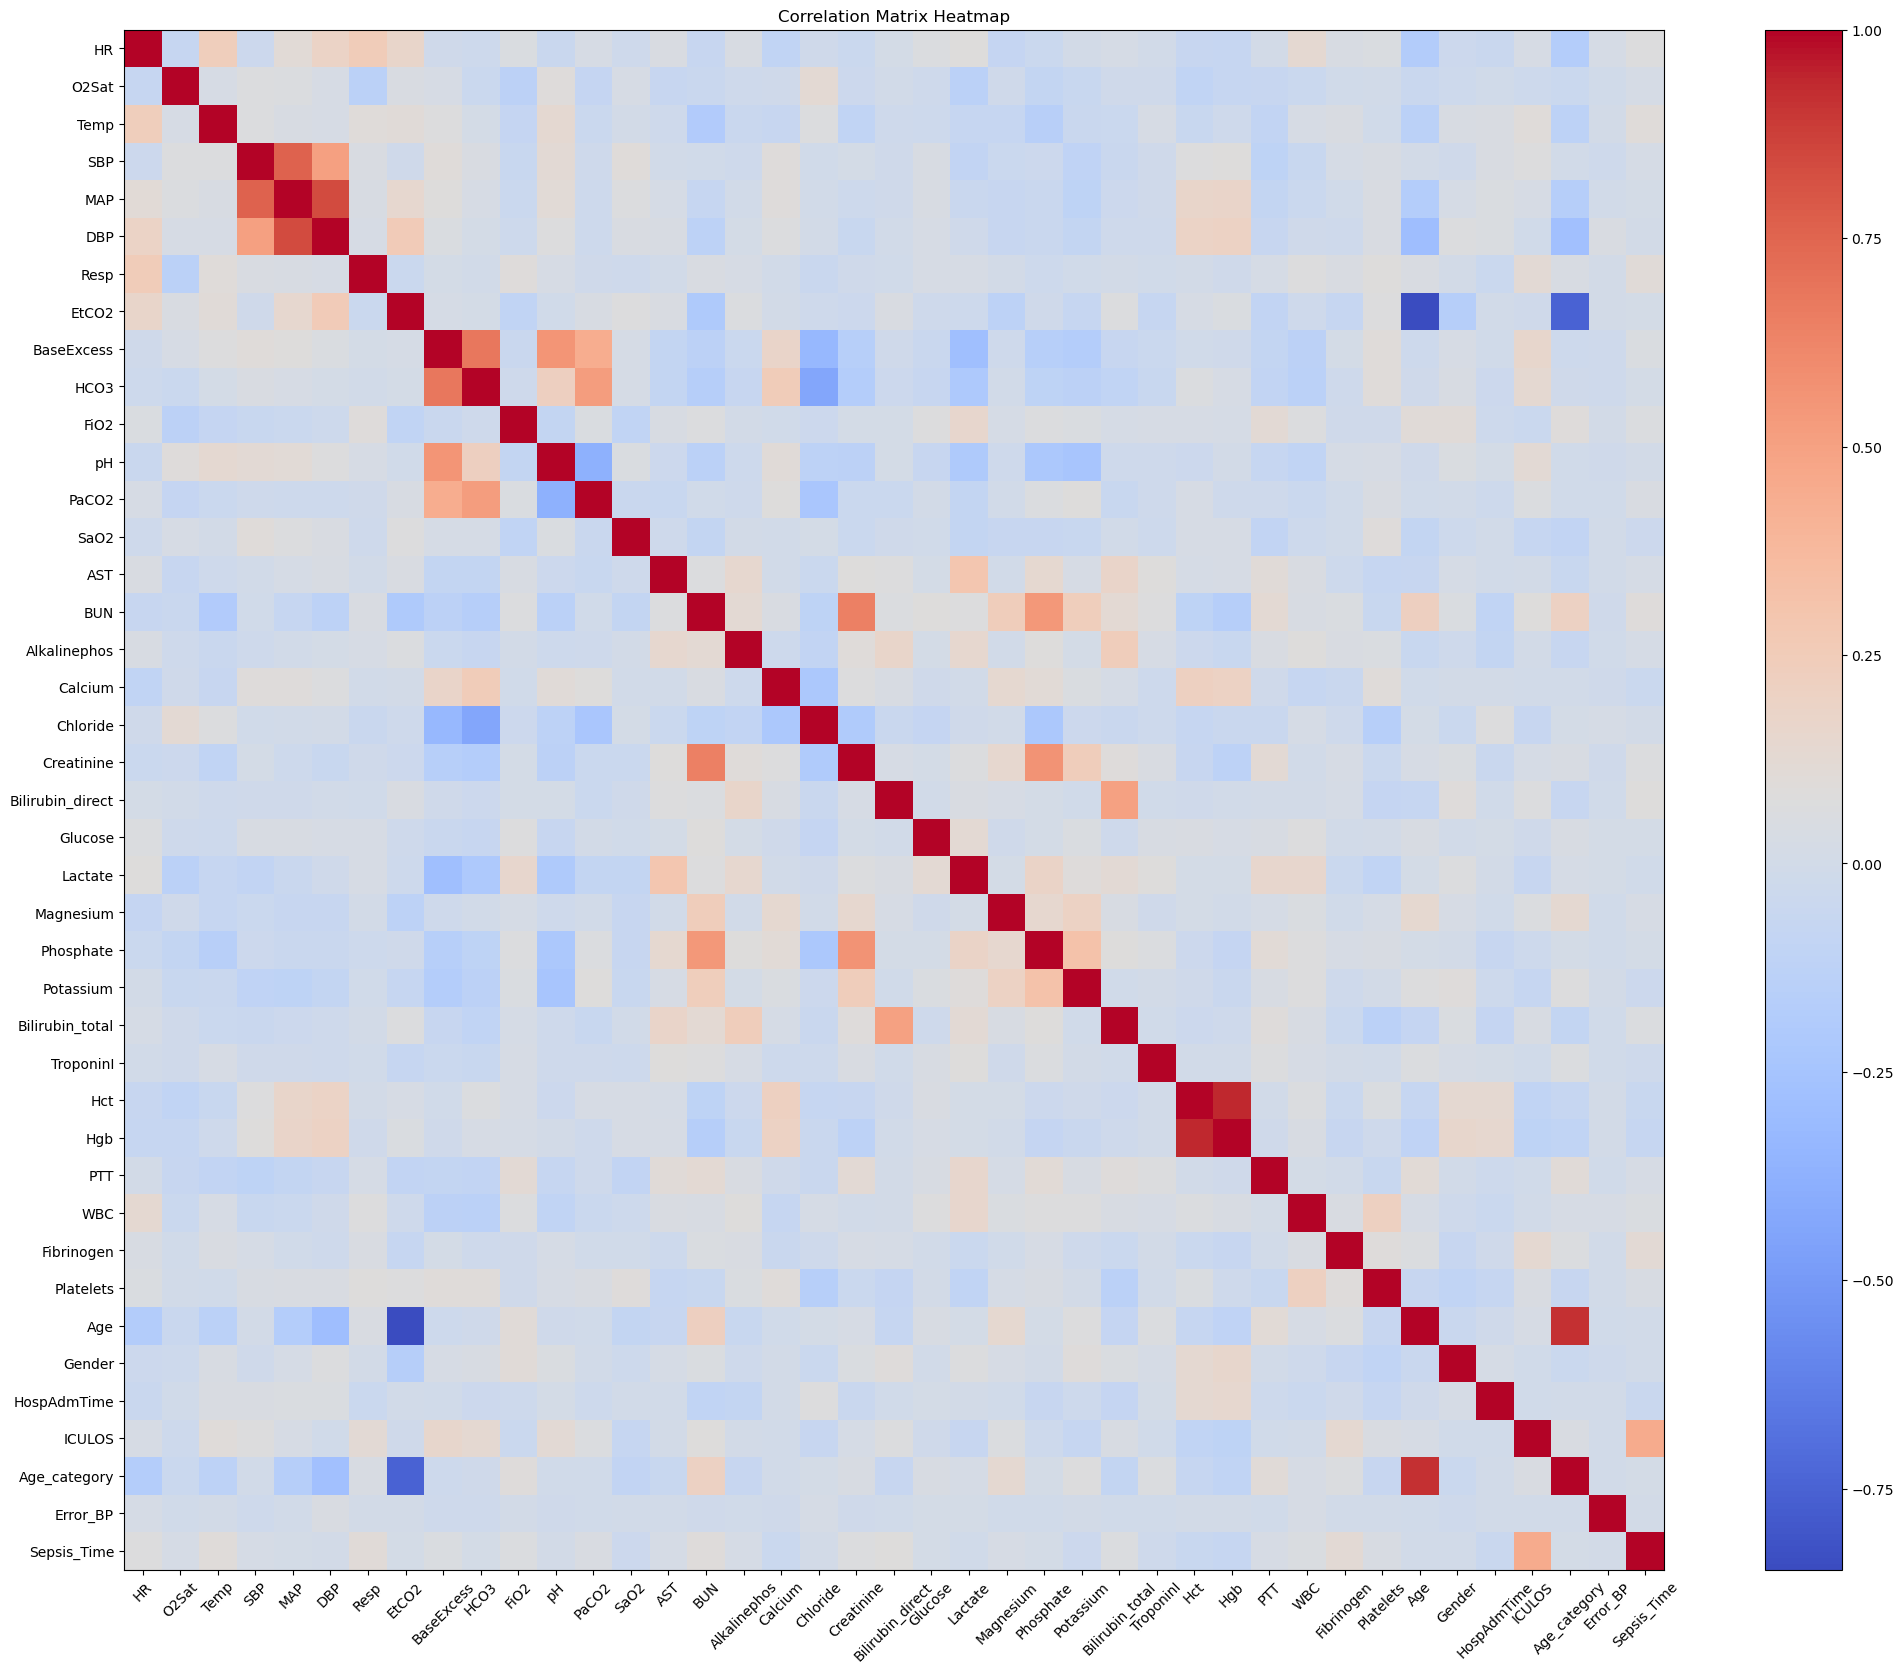

In [34]:
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have your dataframe X already defined

# Sample data for demonstration purposes
# X = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5], 'Feature2': [10, 20, 30, 40, 50]})

# Calculate the correlation matrix using the Pearson correlation coefficient
correlation_matrix = X.corr()

# Create a heatmap of the correlation matrix (optional for visualization)
plt.figure(figsize=(26, 20))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


In [35]:
print(len(X))

301913


In [36]:

# Perform PCA for dimensionality reduction
pca = PCA()
X_reduced = pca.fit_transform(X)



# Correlations between original data and principal components

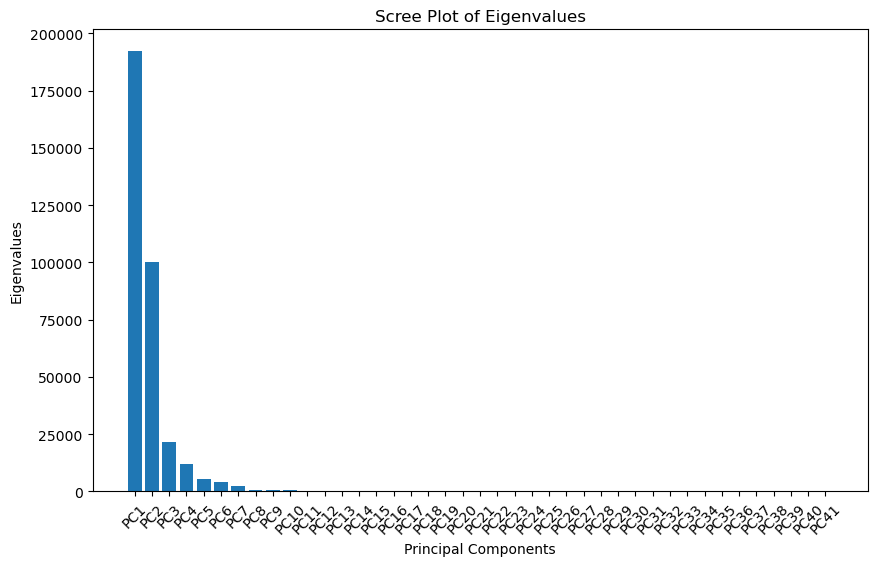

In [37]:

# Assuming you have already performed PCA and have eigenvalues calculated
eigenvalues = pca.explained_variance_

# Create an array of PC names for the X-axis (e.g., PC1, PC2, ...)
pc_names = [f"PC{i+1}" for i in range(len(eigenvalues))]

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(pc_names, eigenvalues)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot of Eigenvalues')
plt.xticks(rotation=45)
plt.show()

#  The correlations between the original data and each principal component.

In [38]:
# Create a DataFrame to store the correlations between features and principal components
num_components_to_retain = 15

correlations_df = pd.DataFrame(index=X.columns)

# Loop through each principal component
for i in range(num_components_to_retain):
    # Calculate the correlation between original features and the current principal component
    correlation_values = np.corrcoef(X.T, X_reduced[:, i])
    
    # Store the correlations in the DataFrame
    correlations_df[f'PC{i+1}'] = correlation_values[-1, :-1]

# Display the correlations
#display(correlations_df)

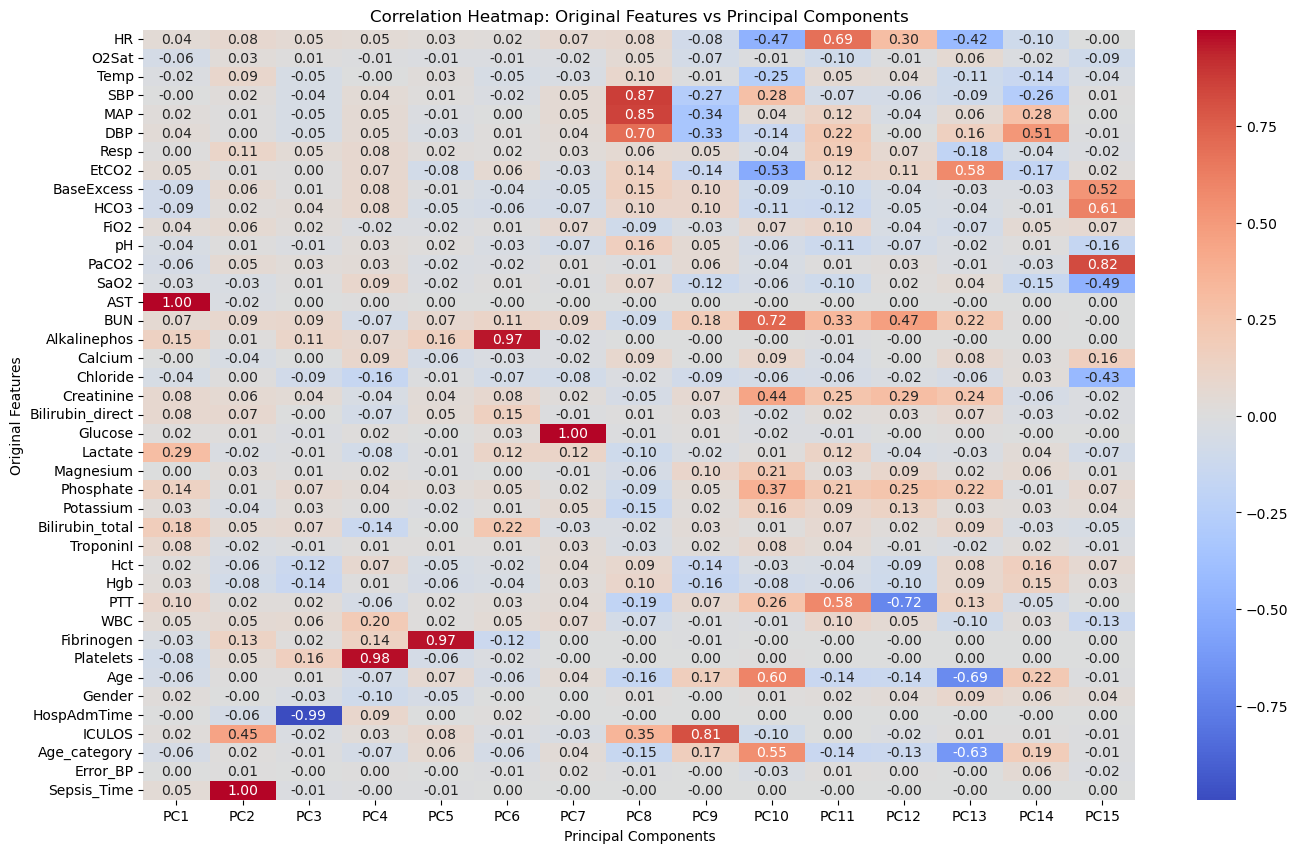

In [39]:
# Set up the plot
plt.figure(figsize=(16, 10))

# Create a heatmap using seaborn
sns.heatmap(correlations_df, annot=True, fmt=".2f", cmap="coolwarm")

# Set plot title and labels
plt.title("Correlation Heatmap: Original Features vs Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")

# Show the plot
plt.show()

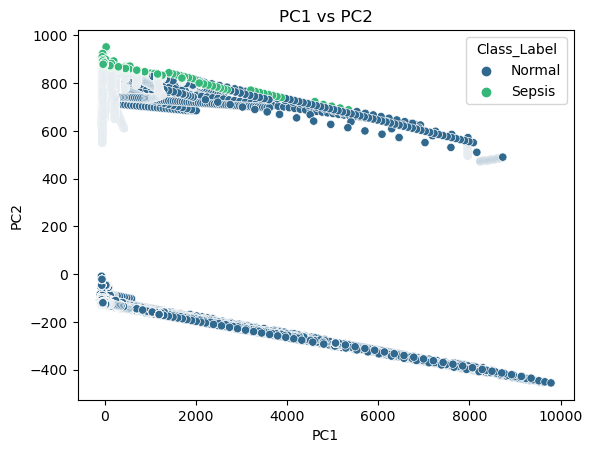

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a 1D array 'y' containing the labels (0 or 1) for each data point

# Create a DataFrame from the first two principal components and the labels
pc_df = pd.DataFrame(data = X_reduced[:, :2], columns = ['PC1', 'PC2'])
pc_df['Class'] = y  # Add class labels

# Map the numerical labels to string descriptions
class_map = {0: 'Normal', 1: 'Sepsis'}
pc_df['Class_Label'] = pc_df['Class'].map(class_map)

# Create the scatter plot
sns.scatterplot(x="PC1", y="PC2", hue="Class_Label", data=pc_df, palette='viridis')
plt.title("PC1 vs PC2")
plt.show()


In [41]:
# Perform PCA for dimensionality reduction
pca = PCA()
X_reduced = pca.fit_transform(X)

# You can set the number of principal components you want to retain
num_components_to_keep = 15
X_reduced = X_reduced[:, :num_components_to_keep]

# Create a dataframe from the reduced data
X = pd.DataFrame(data=X_reduced, columns=[f'PC{i+1}' for i in range(num_components_to_keep)])

In [42]:
print(X.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15'],
      dtype='object')


# Model Training


## Random Forest Classifer

In [43]:
print(len(X))

301913


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, verbose=0)

# Perform cross-validation
cv_results = cross_validate(rf, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results Random Forest")
display(results_df)


Random_Forest_test_f1 = cv_results['test_f1'].mean()
Random_Forest_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Random Forest - Average Test F1 Score:", Random_Forest_test_f1)
print("Random Forest - Average Test Accuracy:", Random_Forest_test_accuracy)

Cross-Validation Results Random Forest


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.999938,0.994055,0.999208,0.872533,0.997826,0.838735,0.998517,0.855300
1,0.999950,0.992895,0.999209,0.889925,0.998419,0.754150,0.998814,0.816431
2,0.999905,0.995644,0.999207,0.928938,0.996245,0.857708,0.997724,0.891903
3,0.999925,0.993077,0.999010,0.846847,0.997431,0.817391,0.998220,0.831858
4,0.999901,0.992432,0.999603,0.878987,0.995652,0.740711,0.997624,0.803947


Random Forest - Average Test F1 Score: 0.8398879631579442
Random Forest - Average Test Accuracy: 0.9936206730666793


# KNN CLassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

# Perform cross-validation
cv_results = cross_validate(knn, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results KNN")
display(results_df)

KNN_CLassifier_test_f1 = cv_results['test_f1'].mean()
KNN_CLassifier_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Knn - Average Test F1 Score:", KNN_CLassifier_test_f1)
print("Knn - Average Test Accuracy:", KNN_CLassifier_test_accuracy)

Cross-Validation Results KNN


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.995375,0.973055,0.928122,0.372893,0.844664,0.419763,0.884428,0.394942
1,0.995359,0.968070,0.923457,0.312394,0.848814,0.436364,0.884564,0.364116
2,0.995450,0.974082,0.929889,0.381517,0.846640,0.381818,0.886314,0.381667
3,0.995558,0.971382,0.928986,0.355583,0.853162,0.450593,0.889461,0.397490
4,0.995131,0.977278,0.922174,0.446660,0.838340,0.354150,0.878261,0.395062


Knn - Average Test F1 Score: 0.38665540921051056
Knn - Average Test Accuracy: 0.9727736239014184


# Logisitic Regression Classifier

In [46]:
#prepare Model
logreg = LogisticRegression(verbose=0,solver = "liblinear")

# Perform cross-validation
cv_results = cross_validate(logreg, X, y,cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results LRC")
display(results_df)


Logisitic_Regression_Classifier_test_f1 = cv_results['test_f1'].mean()
Logisitic_Regression_Classifier_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("LRC - Average Test F1 Score:", Logisitic_Regression_Classifier_test_f1)
print("LRC - Average Test Accuracy:", Logisitic_Regression_Classifier_test_accuracy)

Cross-Validation Results LRC


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.986648,0.985807,0.991430,0.988038,0.365810,0.326482,0.534430,0.490790
1,0.986333,0.987182,0.996612,1.000000,0.348814,0.388142,0.516762,0.559226
2,0.985149,0.984217,0.993964,0.996815,0.292885,0.247431,0.452450,0.396453
3,0.986909,0.986453,0.996859,0.976546,0.376285,0.362055,0.546341,0.528258
4,0.985447,0.984863,0.993610,0.994366,0.307312,0.279051,0.469434,0.435802


LRC - Average Test F1 Score: 0.4821060101760851
LRC - Average Test Accuracy: 0.9857044907207495


# Gradient Boost Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

# Assuming you have already defined X (features) and y (labels)

# Prepare the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Perform cross-validation
cv_results = cross_validate(gb_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results Gradient Boosting")
display(results_df)


Gradient_Boost_Classifier_test_f1 = cv_results['test_f1'].mean()
Gradient_Boost_Classifier_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Gradient Boosting - Average Test F1 Score:", Gradient_Boost_Classifier_test_f1)
print("Gradient Boosting - Average Test Accuracy:", Gradient_Boost_Classifier_test_accuracy)


Cross-Validation Results Gradient Boosting


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.997226,0.995827,0.927708,0.891120,0.940909,0.912253,0.934262,0.901562
1,0.997073,0.995595,0.925513,0.900561,0.935573,0.887747,0.930516,0.894108
2,0.997222,0.996191,0.924386,0.900232,0.944664,0.920158,0.934415,0.910086
3,0.997458,0.994932,0.941948,0.853353,0.936364,0.915415,0.939148,0.883295
4,0.996808,0.995976,0.922229,0.897975,0.925692,0.911462,0.923957,0.904668


Gradient Boosting - Average Test F1 Score: 0.8987440953807863
Gradient Boosting - Average Test Accuracy: 0.9957040587843812


# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import pandas as pd

# Assuming you have already defined X (features) and y (labels)

# Prepare the Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation
cv_results = cross_validate(nb_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results Naive Bayes")
display(results_df)



Naive_Bayes_test_f1 = cv_results['test_f1'].mean()
Naive_Bayes_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Naive Bayes - Average Test F1 Score:", Naive_Bayes_test_f1)
print("Naive Bayes - Average Test Accuracy:", Naive_Bayes_test_accuracy)


Cross-Validation Results Naive Bayes


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.951054,0.945316,0.297908,0.275512,0.984980,0.988142,0.457458,0.430886
1,0.956457,0.954838,0.322282,0.312852,0.977866,0.966008,0.484789,0.472636
2,0.949178,0.955617,0.289834,0.319837,0.983202,0.992885,0.447694,0.483821
3,0.952362,0.948511,0.303715,0.286277,0.985573,0.976285,0.464339,0.442732
4,0.948889,0.954324,0.287869,0.310099,0.976877,0.963636,0.444694,0.469207


Naive Bayes - Average Test F1 Score: 0.45985635468187863
Naive Bayes - Average Test Accuracy: 0.9517211891932564


# Support Vector Machine

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import pandas as pd

# Assuming you have already defined X (features) and y (labels)

# Prepare the Support Vector Machine (SVM) model
svm_model = SVC()

# Perform cross-validation
cv_results = cross_validate(svm_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results Support Vector Machine (SVM)")
display(results_df)


Support_Vector_Machine_test_f1 = cv_results['test_f1'].mean()
Support_Vector_Machine_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Support Vector Machine - Average Test F1 Score:", Support_Vector_Machine_test_f1)
print("Support Vector Machine - Average Test Accuracy:", Support_Vector_Machine_test_accuracy)


Cross-Validation Results Support Vector Machine (SVM)


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.997255,0.995595,0.922058,0.858065,0.949209,0.946245,0.935437,0.900000
1,0.997309,0.996241,0.918724,0.881618,0.956126,0.947826,0.937052,0.913524
2,0.997002,0.997615,0.922447,0.926885,0.935573,0.962055,0.928964,0.944143
3,0.997408,0.994866,0.923415,0.831828,0.955534,0.946245,0.939200,0.885355
4,0.997387,0.997201,0.930084,0.952893,0.946443,0.911462,0.938192,0.931717


Support Vector Machine - Average Test F1 Score: 0.9149477514283506
Support Vector Machine - Average Test Accuracy: 0.9963035691077697


# XGBoost

In [50]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [51]:
import xgboost as xgb
from sklearn.model_selection import cross_validate
import pandas as pd

# Assuming you have already defined X (features) and y (labels)

# Prepare the XGBoost classifier model
xgb_model = xgb.XGBClassifier()

# Perform cross-validation
cv_results = cross_validate(xgb_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results XGBoost")
display(results_df)

XGBoost_test_f1 = cv_results['test_f1'].mean()
XGBoost_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("XGBoost - Average Test F1 Score:", XGBoost_test_f1)
print("XGBoost - Average Test Accuracy:", XGBoost_test_accuracy)


Cross-Validation Results XGBoost


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,1.0,0.997367,1.0,0.925385,1.0,0.950988,1.0,0.938012
1,1.0,0.996655,1.0,0.914910,1.0,0.926482,1.0,0.920660
2,1.0,0.997864,1.0,0.948657,1.0,0.949407,1.0,0.949032
3,1.0,0.996439,1.0,0.884897,1.0,0.954150,1.0,0.918220
4,1.0,0.997764,1.0,0.942790,1.0,0.950988,1.0,0.946871


XGBoost - Average Test F1 Score: 0.9345589447269982
XGBoost - Average Test Accuracy: 0.9972177407666747


# Neural Network with MLP

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

# Assuming you have already defined X (features) and y (labels)

# Prepare the Neural Network (MLP) classifier model
mlp_model = MLPClassifier()

# Perform cross-validation
cv_results = cross_validate(mlp_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results Neural Network (MLP)")
display(results_df)



Neural_Network_test_f1 = cv_results['test_f1'].mean()
Neural_Network_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("Neural Network - Average Test F1 Score:", Neural_Network_test_f1)
print("Neural Network - Average Test Accuracy:", Neural_Network_test_accuracy)


Cross-Validation Results Neural Network (MLP)


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.987886,0.969114,0.819461,0.317961,0.540909,0.414229,0.651667,0.359767
1,0.983919,0.962142,0.648635,0.247152,0.507115,0.394466,0.569210,0.303898
2,0.985385,0.970902,0.844284,0.242678,0.370751,0.183399,0.515243,0.208915
3,0.988850,0.971730,0.762592,0.367665,0.679249,0.485375,0.718512,0.418399
4,0.987906,0.974347,0.774160,0.376091,0.596838,0.340711,0.674032,0.357528


Neural Network - Average Test F1 Score: 0.3297011572891528
Neural Network - Average Test Accuracy: 0.9696469074959687


# LightGBM

In [53]:
%pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [54]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate
import pandas as pd


In [55]:
# Assuming you have already defined X (features) and y (labels)

# Prepare the LightGBM classifier model
lgb_model = lgb.LGBMClassifier()

# Perform cross-validation
cv_results = cross_validate(lgb_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results LightGBM")
display(results_df)


LightGBM_test_f1 = cv_results['test_f1'].mean()
LightGBM_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("LightGBM - Average Test F1 Score:", LightGBM_test_f1)
print("LightGBM - Average Test Accuracy:", LightGBM_test_accuracy)


[LightGBM] [Info] Number of positive: 5060, number of negative: 236470
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 241530, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020950 -> initscore=-3.844455
[LightGBM] [Info] Start training from score -3.844455
[LightGBM] [Info] Number of positive: 5060, number of negative: 236470
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 241530, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020950 -> initscore=-3.844455
[LightGBM] [Info] Start training from score -3.844455
[Lig

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.999474,0.995462,0.984673,0.859840,0.990316,0.935968,0.987486,0.896291
1,0.999528,0.995943,0.984902,0.898438,0.992688,0.909091,0.988780,0.903733
2,0.999408,0.996655,0.981775,0.915559,0.990119,0.925692,0.985929,0.920597
3,0.999611,0.995114,0.988203,0.853499,0.993281,0.925692,0.990735,0.888130
4,0.999441,0.996605,0.981427,0.912773,0.992095,0.926482,0.986732,0.919576


LightGBM - Average Test F1 Score: 0.9056655476565092
LightGBM - Average Test Accuracy: 0.9959557879515313


# CatBoost

In [56]:
%pip install catboost


In [57]:
import catboost as cb
from sklearn.model_selection import cross_validate
import pandas as pd


In [58]:
# Assuming you have already defined X (features) and y (labels)

# Prepare the CatBoost classifier model
catboost_model = cb.CatBoostClassifier()

# Perform cross-validation
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1"], return_train_score=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame(cv_results)
results_df = results_df[['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision',
                         'train_recall', 'test_recall', 'train_f1', 'test_f1']]

# Print the results
print("Cross-Validation Results CatBoost")
display(results_df)


CatBoost_test_f1 = cv_results['test_f1'].mean()
CatBoost_test_accuracy = cv_results['test_accuracy'].mean()

# Print the average results
print("CatBoost - Average Test F1 Score:", CatBoost_test_f1)
print("CatBoost - Average Test Accuracy:", CatBoost_test_accuracy)


Learning rate set to 0.107266
0:	learn: 0.4136941	total: 231ms	remaining: 3m 50s
1:	learn: 0.2365557	total: 286ms	remaining: 2m 22s
2:	learn: 0.1425468	total: 347ms	remaining: 1m 55s
3:	learn: 0.0903118	total: 400ms	remaining: 1m 39s
4:	learn: 0.0655592	total: 452ms	remaining: 1m 29s
5:	learn: 0.0465172	total: 506ms	remaining: 1m 23s
6:	learn: 0.0384792	total: 561ms	remaining: 1m 19s
7:	learn: 0.0270644	total: 619ms	remaining: 1m 16s
8:	learn: 0.0222246	total: 668ms	remaining: 1m 13s
9:	learn: 0.0207569	total: 725ms	remaining: 1m 11s
10:	learn: 0.0184883	total: 779ms	remaining: 1m 10s
11:	learn: 0.0172176	total: 830ms	remaining: 1m 8s
12:	learn: 0.0167864	total: 879ms	remaining: 1m 6s
13:	learn: 0.0157975	total: 931ms	remaining: 1m 5s
14:	learn: 0.0151838	total: 984ms	remaining: 1m 4s
15:	learn: 0.0146282	total: 1.03s	remaining: 1m 3s
16:	learn: 0.0141896	total: 1.09s	remaining: 1m 3s
17:	learn: 0.0139271	total: 1.15s	remaining: 1m 2s
18:	learn: 0.0136550	total: 1.2s	remaining: 1m 1s
1

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,0.999938,0.996588,0.998419,0.911422,0.998617,0.927273,0.998518,0.919279
1,0.999959,0.996340,0.999012,0.912322,0.999012,0.913043,0.999012,0.912683
2,0.999971,0.997715,0.999407,0.946868,0.999209,0.943874,0.999308,0.945368
3,0.999954,0.995197,0.998617,0.866266,0.999209,0.911462,0.998913,0.888290
4,0.999959,0.996721,0.999209,0.925100,0.998814,0.917787,0.999012,0.921429


CatBoost - Average Test F1 Score: 0.9174096299675234
CatBoost - Average Test Accuracy: 0.996512236616668


# Confusion Matrix

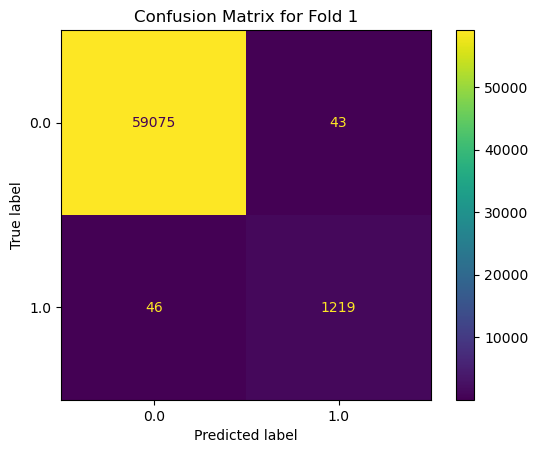

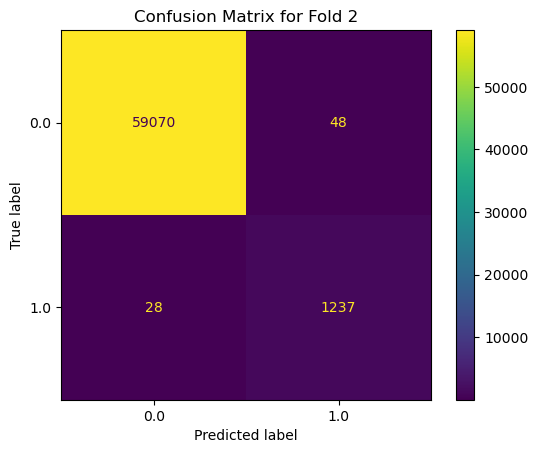

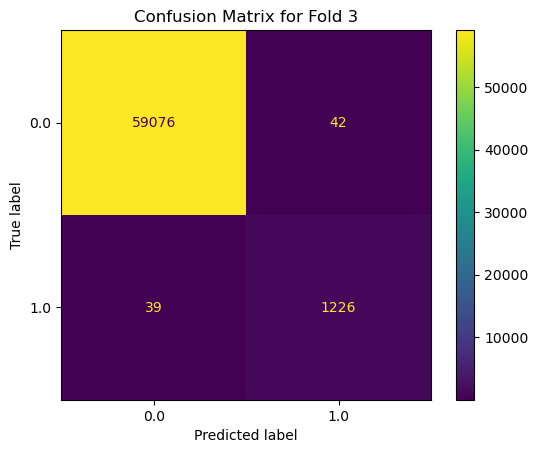

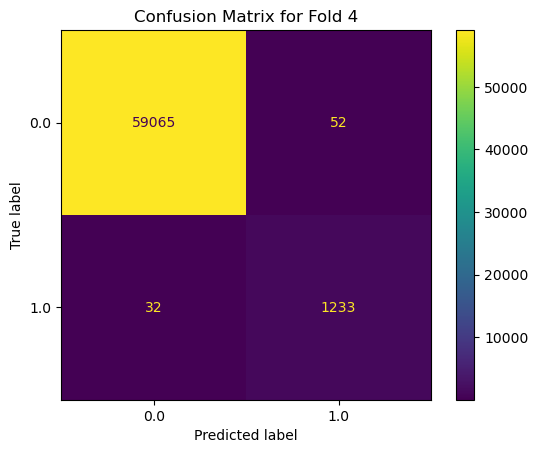

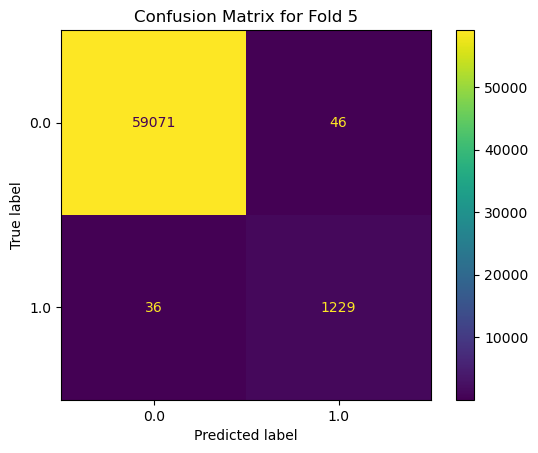

In [59]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

# Check if X is a DataFrame
is_X_dataframe = isinstance(X, pd.DataFrame)
is_y_series = isinstance(y, pd.Series)
xgb_model = xgb.XGBClassifier()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store results
confusion_matrices = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    if is_X_dataframe:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    else:
        X_train, X_test = X[train_index], X[test_index]
        
    if is_y_series:
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    else:
        y_train, y_test = y[train_index], y[test_index]

    # Fit the model and make predictions
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    # Compute confusion matrix and add to the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Display each confusion matrix
for idx, cm in enumerate(confusion_matrices, 1):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for Fold {idx}")
    plt.show()


# Model Comparison

In [60]:
import pandas as pd

models = ['Random Forest Classifer', 'KNN CLassifier', 'Logisitic Regression Classifier', 'Gradient Boost Classifier' ,'Naive Bayes','Support Vector Machine','XGBoost','Neural Network','LightGBM','CatBoost']
tests_accuracy = [Random_Forest_test_accuracy,KNN_CLassifier_test_accuracy,Logisitic_Regression_Classifier_test_accuracy,Gradient_Boost_Classifier_test_accuracy, Naive_Bayes_test_accuracy,Support_Vector_Machine_test_accuracy,XGBoost_test_accuracy,Neural_Network_test_accuracy,LightGBM_test_accuracy,CatBoost_test_accuracy]
tests_score = [Random_Forest_test_f1,KNN_CLassifier_test_f1,Logisitic_Regression_Classifier_test_f1,Gradient_Boost_Classifier_test_f1, Naive_Bayes_test_f1,Support_Vector_Machine_test_f1,XGBoost_test_f1,Neural_Network_test_f1,LightGBM_test_f1,CatBoost_test_f1]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Test Accuracy': tests_accuracy, 'Tests F1 Score': tests_score })
compare_models.sort_values(by = 'Tests F1 Score', ascending = False)


compare_models = pd.DataFrame({ 'Algorithms': models, 'Test Accuracy': tests_accuracy, 'Tests F1 Score': tests_score })
compare_models = compare_models.sort_values(by='Tests F1 Score', ascending=False)

# Resetting the index for proper numbering and drop the old index
compare_models = compare_models.reset_index(drop=True)

# Adding a column for the 'Rank' based on the 'Tests Score'
compare_models['Rank'] = compare_models['Tests F1 Score'].rank(ascending=False, method='min').astype(int)

# Reordering the columns to place 'Rank' at the beginning
compare_models = compare_models[['Rank', 'Algorithms', 'Test Accuracy', 'Tests F1 Score']]

# Styling the table for borders
styled_table = compare_models.style.set_table_attributes('border="1"').set_table_styles({
    '': [{
        'selector': '',
        'props': [('border', '1px solid black'), 
                  ('border-collapse', 'collapse')]
    }]
}).hide_index()

# Display the styled table
display(styled_table)

C:\Users\akibe\AppData\Local\Temp\ipykernel_4228\1444830374.py:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  }).hide_index()


Rank,Algorithms,Test Accuracy,Tests F1 Score
1,XGBoost,0.997218,0.934559
2,CatBoost,0.996512,0.917410
3,Support Vector Machine,0.996304,0.914948
4,LightGBM,0.995956,0.905666
5,Gradient Boost Classifier,0.995704,0.898744
6,Random Forest Classifer,0.993621,0.839888
7,Logisitic Regression Classifier,0.985704,0.482106
8,Naive Bayes,0.951721,0.459856
9,KNN CLassifier,0.972774,0.386655
10,Neural Network,0.969647,0.329701


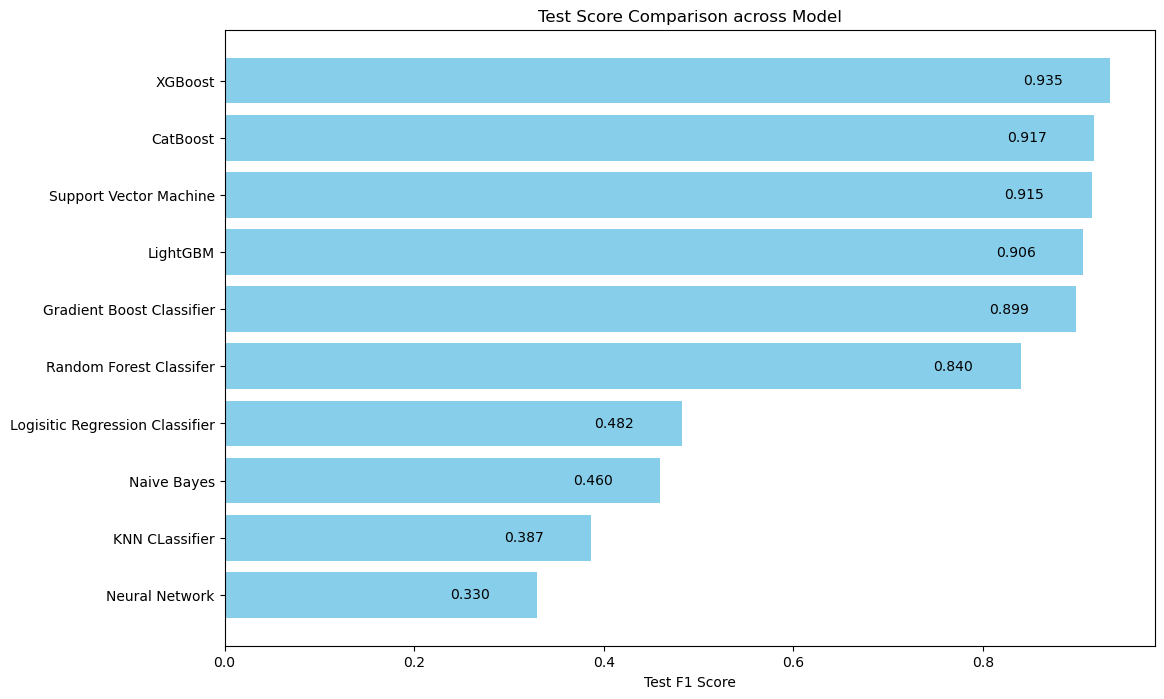

In [61]:
import matplotlib.pyplot as plt

# Sorting the DataFrame based on 'Tests Score'
df_sorted = compare_models.sort_values(by='Tests F1 Score', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Algorithms'], df_sorted['Tests F1 Score'], color='skyblue')

# Display the value of each bar
for bar in bars:
    plt.text(bar.get_width() - 0.05,  # x position of the text
             bar.get_y() + bar.get_height()/2,  # y position of the text
             '{:.3f}'.format(bar.get_width()),  # value to be displayed
             va='center', ha='right', color='black', fontsize=10)  # vertical alignment, horizontal alignment, color, and font size

plt.xlabel('Test F1 Score')
plt.title('Test Score Comparison across Model')
plt.show()


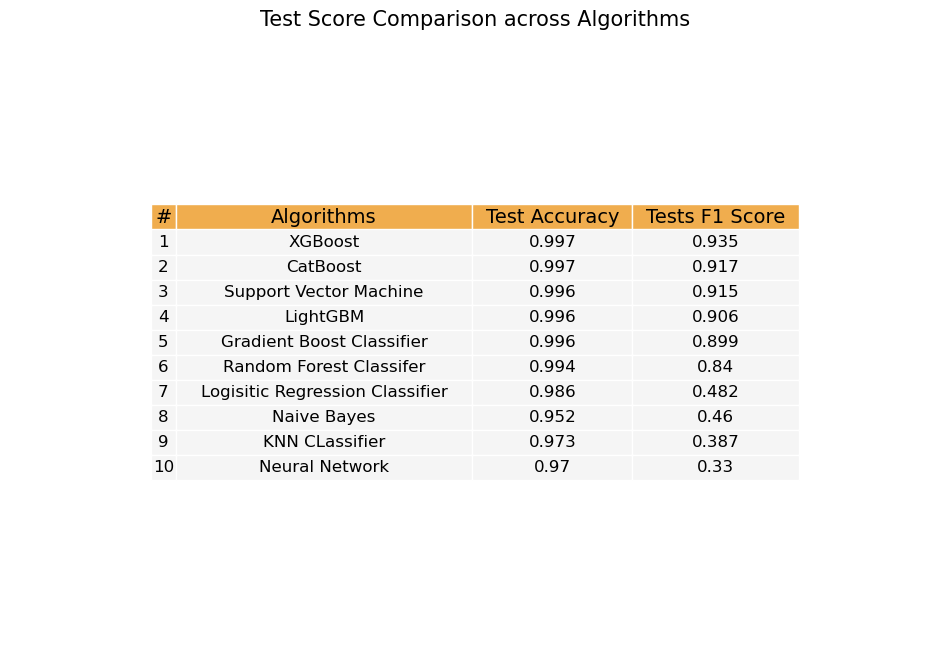

In [62]:
# import matplotlib.pyplot as plt

# # Sort the DataFrame based on 'Tests Score'
# df_sorted = compare_models.sort_values(by='Tests F1 Score', ascending=False)

# # Add row numbers
# df_sorted['#'] = range(1, len(df_sorted) + 1)
# df_sorted = df_sorted[['#', 'Algorithms', 'Test Accuracy', 'Tests F1 Score']]

# fig, ax = plt.subplots(figsize=(12, 8))  # set the size that you'd like (width, height)
# ax.axis('off')  # turn off the axis

# # Set table properties for better design
# colors = [["#f5f5f5"]*4]*len(df_sorted)  # light gray color for every cell. Use 4 because there are 4 columns
# table = ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, cellLoc='center', loc='center', cellColours=colors)
# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.auto_set_column_width(col=list(range(len(df_sorted.columns))))  # Provide the ncols of the dataframe 
# table.scale(1, 1.5)  # Adjust width-spacing and height-spacing

# # Highlight header
# for (i, j), cell in table.get_celld().items():
#     if i == 0:
#         cell.set_fontsize(14)
#         cell.set_facecolor('#f0ad4e')
#     cell.set_edgecolor('w')  # remove cell borders for cleaner look

# plt.title('Test Score Comparison across Algorithms', size=15)
# plt.show()



import matplotlib.pyplot as plt

# Sort the DataFrame based on 'Tests Score'
df_sorted = compare_models.sort_values(by='Tests F1 Score', ascending=False)

# Round 'Test Accuracy' and 'Tests F1 Score' to 3 decimal places
df_sorted['Test Accuracy'] = df_sorted['Test Accuracy'].round(3)
df_sorted['Tests F1 Score'] = df_sorted['Tests F1 Score'].round(3)

# Add row numbers
df_sorted['#'] = range(1, len(df_sorted) + 1)
df_sorted = df_sorted[['#', 'Algorithms', 'Test Accuracy', 'Tests F1 Score']]

fig, ax = plt.subplots(figsize=(12, 8))  # set the size that you'd like (width, height)
ax.axis('off')  # turn off the axis

# Set table properties for better design
colors = [["#f5f5f5"]*4]*len(df_sorted)  # light gray color for every cell. Use 4 because there are 4 columns
table = ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, cellLoc='center', loc='center', cellColours=colors)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df_sorted.columns))))  # Provide the ncols of the dataframe 
table.scale(1, 1.5)  # Adjust width-spacing and height-spacing

# Highlight header
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(14)
        cell.set_facecolor('#f0ad4e')
    cell.set_edgecolor('w')  # remove cell borders for cleaner look

plt.title('Test Score Comparison across Algorithms', size=15)
plt.show()


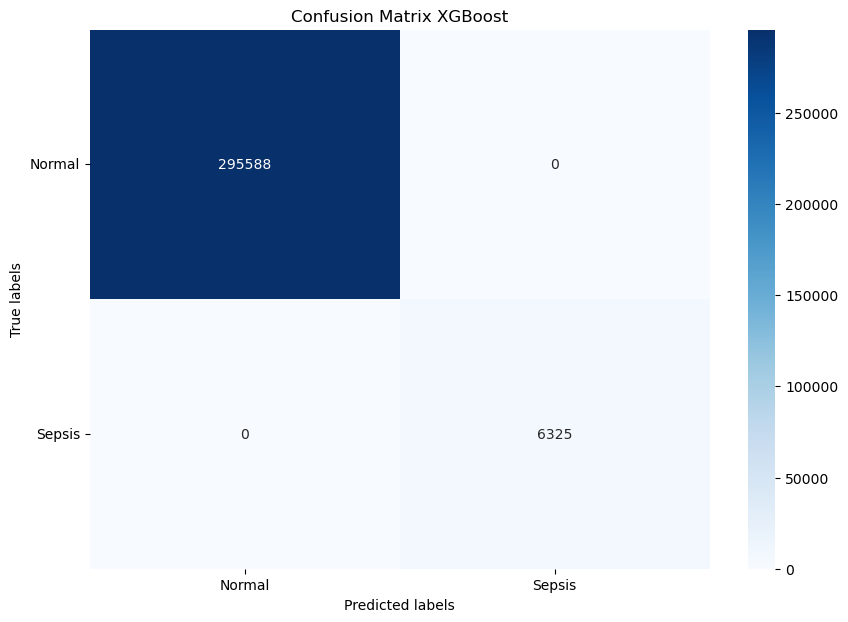

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    295588
      Sepsis       1.00      1.00      1.00      6325

    accuracy                           1.00    301913
   macro avg       1.00      1.00      1.00    301913
weighted avg       1.00      1.00      1.00    301913



In [63]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the model
# xgb_model.fit(X_train, y_train)

# # Predict the labels
# y_pred = xgb_model.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix XGBoost')
# plt.show()

# Print classification report for additional metrics
# print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the model on the entire data
xgb_model.fit(X, y)

# Predict the labels using the same data
y_pred = xgb_model.predict(X)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.xticks([0.5,1.5], ['Normal', 'Sepsis'])
plt.yticks([0.5,1.5], ['Normal', 'Sepsis'], rotation=0)  # Setting rotation to 0 makes it easier to read
plt.show()

# Print classification report for additional metrics
print(classification_report(y, y_pred, target_names=['Normal', 'Sepsis']))




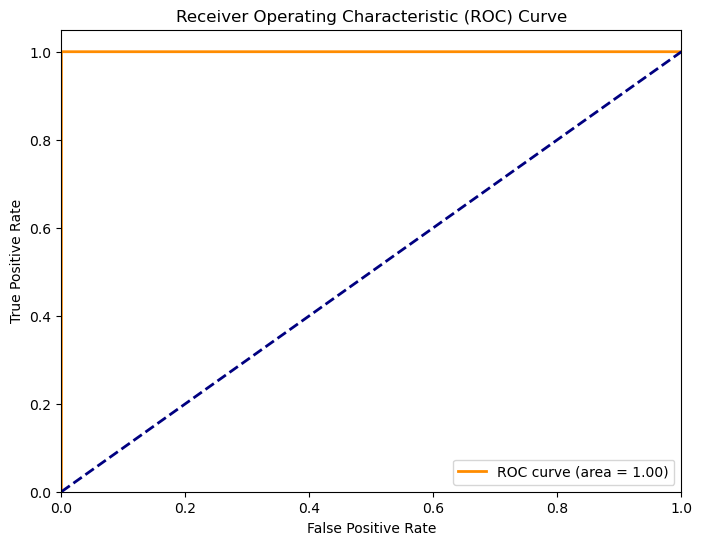

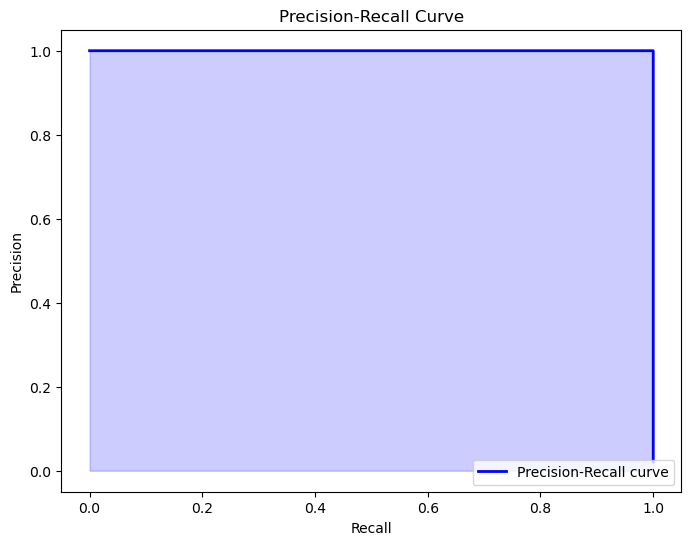

AUC-ROC: 1.0


In [64]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

# Assuming xgb_model is a binary classification model

# Predict the probabilities of the positive class
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC-ROC
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))




[LightGBM] [Info] Number of positive: 5073, number of negative: 236457
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 241530, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021004 -> initscore=-3.841834
[LightGBM] [Info] Start training from score -3.841834


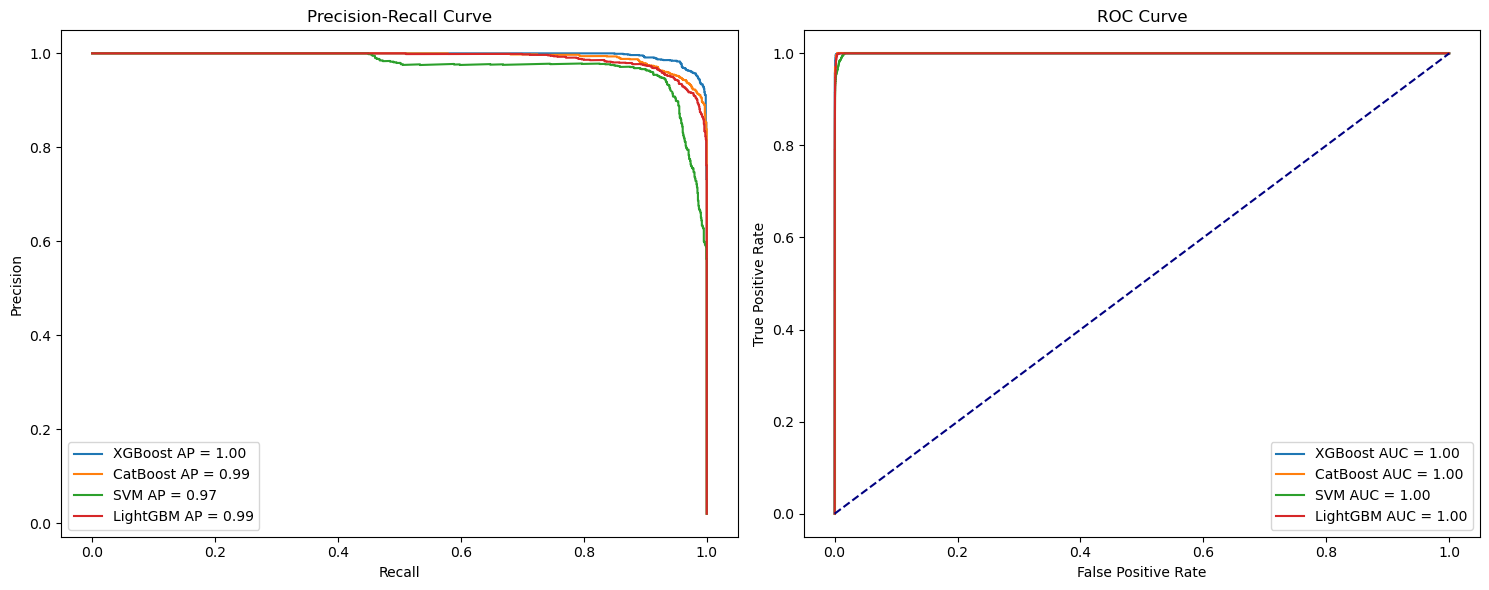

AUC-ROC Scores:
XGBoost: 1.00
CatBoost: 1.00
SVM: 1.00
LightGBM: 1.00


In [65]:
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score

# Assuming you have already defined X (features) and y (labels)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'XGBoost': xgb.XGBClassifier(),
    'CatBoost': cb.CatBoostClassifier(silent=True),  # silent=True to suppress iteration outputs
    'SVM': SVC(probability=True),
    'LightGBM': lgb.LGBMClassifier()
}

plt.figure(figsize=(15, 6))

# For Precision-Recall Curve
plt.subplot(1, 2, 1)
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    predicted_probabilities = model.predict_proba(X_test)
    
    # Extract the probabilities of the positive class
    positive_class_probs = predicted_probabilities[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, positive_class_probs)
    avg_precision = average_precision_score(y_test, positive_class_probs)
    
    plt.plot(recall, precision, label=f'{model_name} AP = {avg_precision:.2f}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# For ROC Curve and AUC-ROC scores
plt.subplot(1, 2, 2)
roc_scores = {}
for model_name, model in models.items():
    predicted_probabilities = model.predict_proba(X_test)
    positive_class_probs = predicted_probabilities[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, positive_class_probs)
    roc_auc = auc(fpr, tpr)
    roc_scores[model_name] = roc_auc  # Store the AUC-ROC score
    
    plt.plot(fpr, tpr, label=f'{model_name} AUC = {roc_auc:.2f}')
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Display AUC-ROC scores
print("AUC-ROC Scores:")
for model, score in roc_scores.items():
    print(f"{model}: {score:.2f}")


In [66]:
# import pandas as pd

# # Create a sample dataframe
# X = pd.DataFrame(columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
#        'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

# # Rename columns
# column_mapping = {
#     'PC1': 'AST',
#     'PC2': 'Sepsis_Time',
#     'PC3': 'HospAdmTime',
#     'PC4': 'Platelets',
#     'PC5': 'Fibrinogen ',
#     'PC6': 'Alkalinephos',
#     'PC7': 'Glucose',
#     'PC8': 'MAP,DBP,SBP',
#     'PC9': 'ICULOS ',
#     'PC10': 'Age,Alkalinephos',
#     'PC11': 'PTT',
#     'PC12': 'Phosphate,Creatinine',
#     'PC13': 'EtCO2',
#     'PC14': 'DBP',
#     'PC15': 'PaCO2',
#     # Add other mappings as necessary
# }

# X = X.rename(columns=column_mapping)

# print(X.columns)


X.rename(columns={
    'PC1': 'AST',
    'PC2': 'Sepsis_Time',
    'PC3': 'HospAdmTime',
    'PC4': 'Platelets',
    'PC5': 'Fibrinogen ',
    'PC6': 'Alkalinephos',
    'PC7': 'Glucose',
    'PC8': 'MAP,DBP,SBP',
    'PC9': 'ICULOS ',
    'PC10': 'Age,Alkalinephos',
    'PC11': 'PTT',
    'PC12': 'Phosphate,Creatinine',
    'PC13': 'EtCO2',
    'PC14': 'DBP',
    'PC15': 'PaCO2',
    # add more if needed
}, inplace=True)
print(X.columns)

Index(['AST', 'Sepsis_Time', 'HospAdmTime', 'Platelets', 'Fibrinogen ',
       'Alkalinephos', 'Glucose', 'MAP,DBP,SBP', 'ICULOS ', 'Age,Alkalinephos',
       'PTT', 'Phosphate,Creatinine', 'EtCO2', 'DBP', 'PaCO2'],
      dtype='object')


In [67]:
print(len(X))

301913


# Explainable AI

In [68]:
!pip install shap
!pip install lime

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
invalid value encountered in divide


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


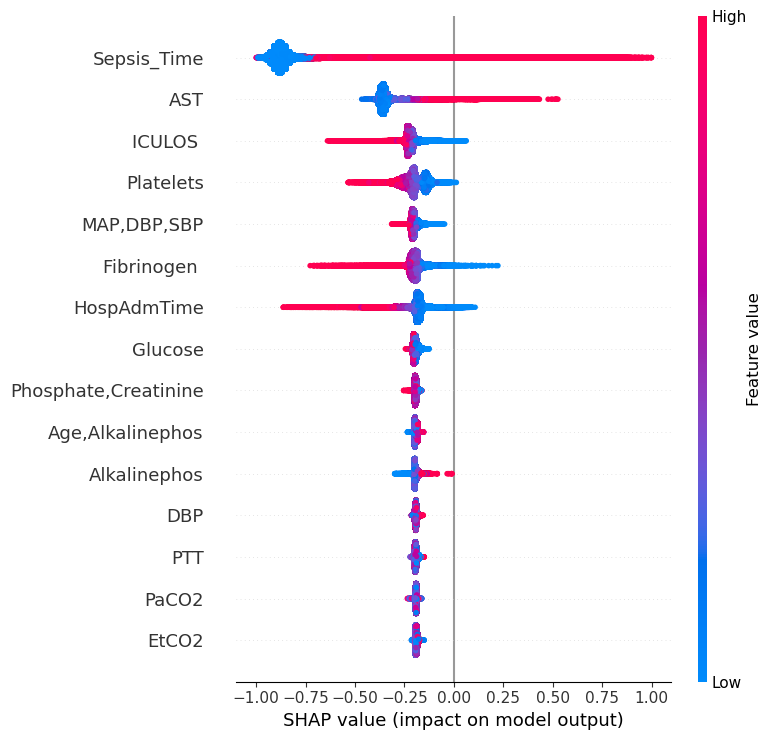

In [69]:
import shap
import matplotlib.pyplot as plt
# # Train the model
xgb_model.fit(X, y)

# # Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# # Visualize the first prediction's explanation
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# # For a summary of all features
# shap.summary_plot(shap_values, X)

import numpy as np

# Manually scaling function
def scale_to_range(values, low, high):
    min_val = np.min(values)
    max_val = np.max(values)
    return low + (high - low) * (values - min_val) / (max_val - min_val)

# Scale the SHAP values
scaled_shap_values = scale_to_range(shap_values, -1, 1)
scaled_expected_value = scale_to_range(np.array([explainer.expected_value]), -1, 1)[0]

# Use scaled values for visualization
shap.initjs()
shap.force_plot(scaled_expected_value, scaled_shap_values[0, :], X.iloc[0, :])
shap.summary_plot(scaled_shap_values, X)





In [70]:
import lime
import lime.lime_tabular

# Create a Lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values, 
    training_labels=y,
    feature_names=X.columns, 
    class_names=['Normal', 'Sepsis'],  # assuming binary classification
    mode='classification'
)

# Explain a single instance (e.g., the first instance)
exp = explainer.explain_instance(X.values[0], xgb_model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)
